In [1]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/csv/Boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.columns.tolist()

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [4]:
df.shape

(506, 14)

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Simple Linear Regression

Regress medv (response) onto lstat (predictor)

medv = median value of owner-occupied homes (in $1000s)  
lstat = lower status of the population (percent)

In [6]:
model = LinearRegression()

### Model Fit

In [7]:
model.fit(X=df[['lstat']], y=df['medv'])

/Users/divyanair/.pyenv/versions/2.7.14/envs/islr_env/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
print model.intercept_ 
print model.coef_

34.5538408794
[-0.95004935]


The model is medv $\approx 34.55 -0.95 \times$ lstat

In [9]:
model.score(X=df[['lstat']], y=df['medv'])

0.5441462975864797

The coefficient of determination $R^2=0.54$

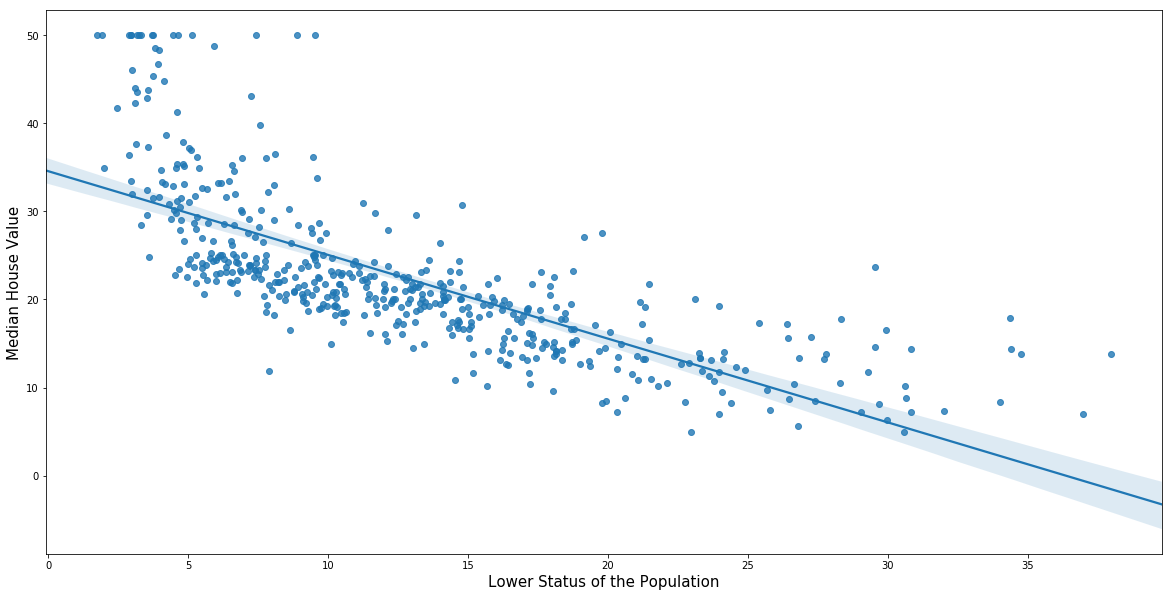

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.regplot(x=df['lstat'], y=df['medv'], ci=95)  # show 95% confidence interval of the estimate
plt.ylabel('Median House Value', fontsize=15)
plt.xlabel('Lower Status of the Population', fontsize=15);

Their is some evidence of a non-linear relationship between medv and lstat

### Model Accuracy

In [11]:
ypred = model.predict(X=df[['lstat']])

In [12]:
r2_score(df['medv'], ypred)

0.5441462975864797

The coefficient of determination $R^2=0.54$

In [13]:
print("MSE = %.2f" % mean_squared_error(df['medv'], ypred))

MSE = 38.48


In [14]:
explained_variance_score(df['medv'], ypred)

0.54414629758647981

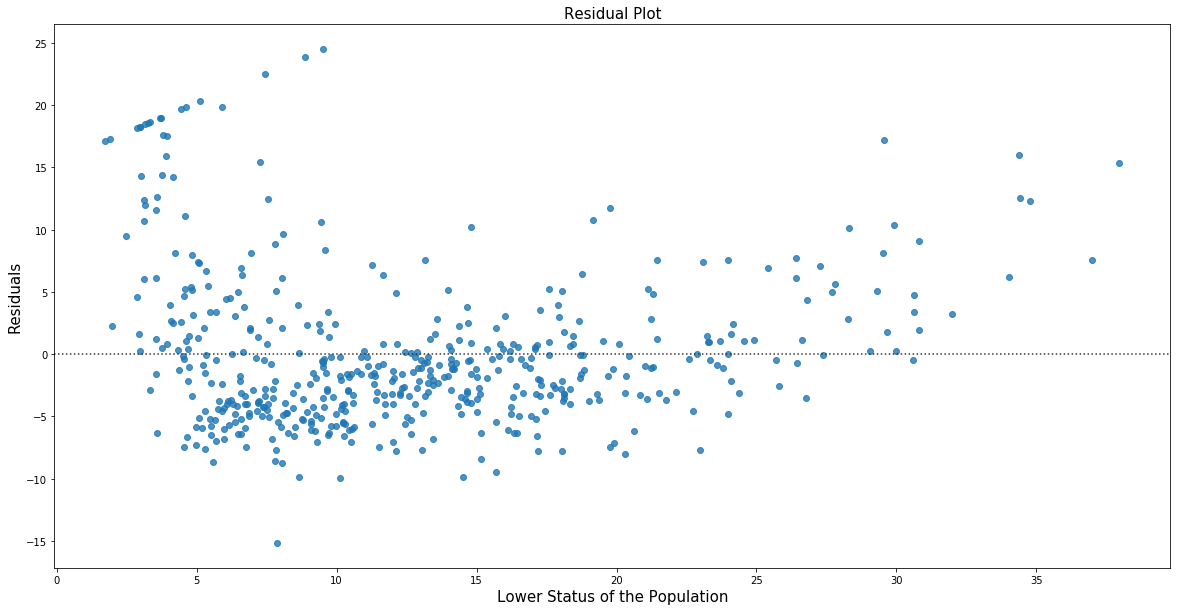

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.residplot(x=df['lstat'], y=df['medv'])
plt.title('Residual Plot', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.xlabel('Lower Status of the Population', fontsize=15);

The above residual plot and $R^2=0.54$ provide evidence that a linear fit is not the best way to explain the relationship between medv and lstat